In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle

In [4]:
# Load the data from profike.pkl
with open('profiles.pkl', 'rb') as f:
    df = pickle.load(f)

In [5]:
df.head(3)

,bios,games,music,movies,jokes
0,Hipster-friendly explorer. Beer trailblazer. I...,4,9,4,4
1,Lifelong music scholar. Typical zombie evangel...,6,5,9,9
2,Writer. Friendly twitter scholar. Hardcore rea...,7,5,2,4


## Scaling The Data
Scaling the data is important because it will help us to compare the data points. If we don't scale the data, the data points with higher values will have more weightage than the data points with lower values. This will lead to wrong results. We will use the MinMaxScaler() function from the sklearn library to scale the data.

[ ]: from sklearn.preprocessing import MinMaxScaler

In [6]:
# import minmax scaler
from sklearn.preprocessing import MinMaxScaler

# instantiate the Scaler
scaler = MinMaxScaler()

# Scale the categories then replace the old values
df = df[['bios']].join(
    pd.DataFrame(scaler.fit_transform(df.drop('bios', axis=1)), columns=df.columns[1:], index=df.index))

df

,bios,games,music,movies,jokes
0,Hipster-friendly explorer. Beer trailblazer. I...,0.444444,1.000000,0.444444,0.444444
1,Lifelong music scholar. Typical zombie evangel...,0.666667,0.555556,1.000000,1.000000
2,Writer. Friendly twitter scholar. Hardcore rea...,0.777778,0.555556,0.222222,0.444444
3,Pop culture buff. Reader. Certified gamer. Web...,0.888889,1.000000,0.666667,0.888889
4,General organizer. Troublemaker. Certified alc...,0.777778,0.777778,0.000000,0.555556
...,...,...,...,...,...
6820,Food geek. Web fanatic. Music evangelist. Pass...,0.111111,1.000000,1.000000,0.777778
6821,Lifelong beer expert. Alcohol advocate. Thinke...,0.333333,1.000000,0.777778,0.888889
6822,Devoted problem solver. Typical bacon ninja. W...,0.888889,0.666667,0.777778,0.444444
6823,Coffeeaholic. Travel fan. Infuriatingly humble...,0.111111,0.222222,0.111111,0.444444


## Vectorizing The Bios
We will use the count vectorizer to vectorize the bios. We will use the fit_transform() function to fit the vectorizer to the bios and transform the bios into vectors. We will be experiemnting Count Vectorizatiın and TFIDF Vectorization approaches to find best vectorization method.

In [7]:
# instantiate the vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [8]:
vectorizer = CountVectorizer()
#vectorizer = TfidfVectorizer()

# fit the vectorizer
X = vectorizer.fit_transform(df['bios'])

#create a new df with the vectorized data
df_words = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

# concate the two dataframes
concatained_df = pd.concat([df, df_words], axis=1)

# drop the bios column
concatained_df.drop('bios', axis=1, inplace=True)

concatained_df

/opt/conda/envs/conda-env-movie/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,games,music,movies,jokes,advocate,aficionado,alcohol,alcoholaholic,amateur,analyst,...,unable,unapologetic,wannabe,web,webaholic,winning,with,writer,zombie,zombieaholic
0,0.444444,1.000000,0.444444,0.444444,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0.666667,0.555556,1.000000,1.000000,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0.777778,0.555556,0.222222,0.444444,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.888889,1.000000,0.666667,0.888889,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.777778,0.777778,0.000000,0.555556,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6820,0.111111,1.000000,1.000000,0.777778,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6821,0.333333,1.000000,0.777778,0.888889,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6822,0.888889,0.666667,0.777778,0.444444,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6823,0.111111,0.222222,0.111111,0.444444,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We will use the Principal Component Analysis (PCA) to reduce the dimensions of the vectorized bios. We will use the fit_transform() function to fit the PCA to the vectorized bios and transform the vectorized bios into vectors with reduced dimensions.

In [9]:
#import PCA
from sklearn.decomposition import PCA

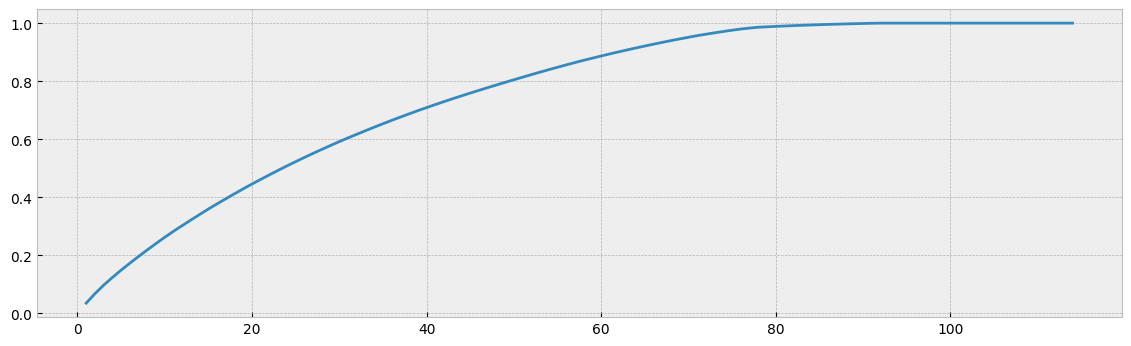

Number features: 69
Total Variance Explained: 0.951293930037321
0.9456494968022


In [10]:
#pca = PCA(n_components=2, random_state=42)
pca = PCA()

# fit the PCA
pca_df = pca.fit_transform(concatained_df)

# Plotting to determine how many features should the dataset be reduced to
plt.style.use("bmh")
plt.figure(figsize=(14,4))
plt.plot(range(1,concatained_df.shape[1]+1), pca.explained_variance_ratio_.cumsum())
plt.show()

# Finding the exact number of features that explain at least 95% of the variance in the dataset
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_95 = len(total_explained_variance[total_explained_variance>=.95])
n_to_reach_95 = concatained_df.shape[1] - n_over_95

# Printing out the number of features needed to retain 95% variance
print(f"Number features: {n_to_reach_95}\nTotal Variance Explained: {total_explained_variance[n_to_reach_95]}")

# Reducing the dataset to the number of features determined before
pca = PCA(n_components=n_to_reach_95)

# Fitting and transforming the dataset to the stated number of features and creating a new DF
df_pca = pca.fit_transform(concatained_df)

# Seeing the variance ratio that still remains after the dataset has been reduced
print(pca.explained_variance_ratio_.cumsum()[-1])

Author: Marco Santos
After running our code, the number of features that account for 95% of the variance is 74. With that number in mind, we can apply it to our PCA function to reduce the number of Principal Components or Features in our last DF to 74 from 117. These features will now be used instead of the original DF to fit to our clustering algorithm.

## Clustering the profiles.
By using our scaled, vectorized and PCA'd data, we will now cluster the profiles. For reaching this goal firstly, we must find the optimuum number of clusters to create.

In [11]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

# set the number of clusters
n_clusters = 20
cluster_cnt = [i for i in range(2, n_clusters, 2)]

# create a list to hold scores for evaluation
scores = []

db_scores = []

# Looping through different iterations for the number of clusters
'''for i in cluster_cnt:
    # instantiate the model
    kmeans = KMeans(n_clusters=i, random_state=42)
    # fit the model
    kmeans.fit(df_pca)
    # get the score
    score = kmeans.score(df_pca)
    # append the score to the list
    scores.append(score)
    
    # instantiate the model
    dbscan = DBSCAN(eps=0.3, min_samples=10)
    # fit the model
    dbscan.fit(df_pca)
    # get the score
    db_score = dbscan.score(df_pca)
    # append the score to the list
    db_scores.append(db_score)'''

for i in cluster_cnt:
    
    # Hierarchical Agglomerative Clustering with different number of clusters
    hac = AgglomerativeClustering(n_clusters=i)
    # fit the model
    hac.fit(df_pca)

    cluster_assignments = hac.labels_

    # get the score
    score = silhouette_score(df_pca, cluster_assignments)

    # kmeans clustering with different number of clusters
    #kmeans = KMeans(n_clusters=i)
    # fit the model
    #kmeans.fit(df_pca)

    #cluster_assignments = kmeans.predict(df_pca)

    # get the score
    #score = silhouette_score(df_pca, cluster_assignments)

    scores.append(silhouette_score(df_pca, cluster_assignments))
    
    db_scores.append(davies_bouldin_score(df_pca, cluster_assignments))


    

# Evaluation of the Clustering

Max Value:
Cluster #     Cluster Score
10       0.045588

Min Value:
Cluster #    Cluster Score
2       0.023411


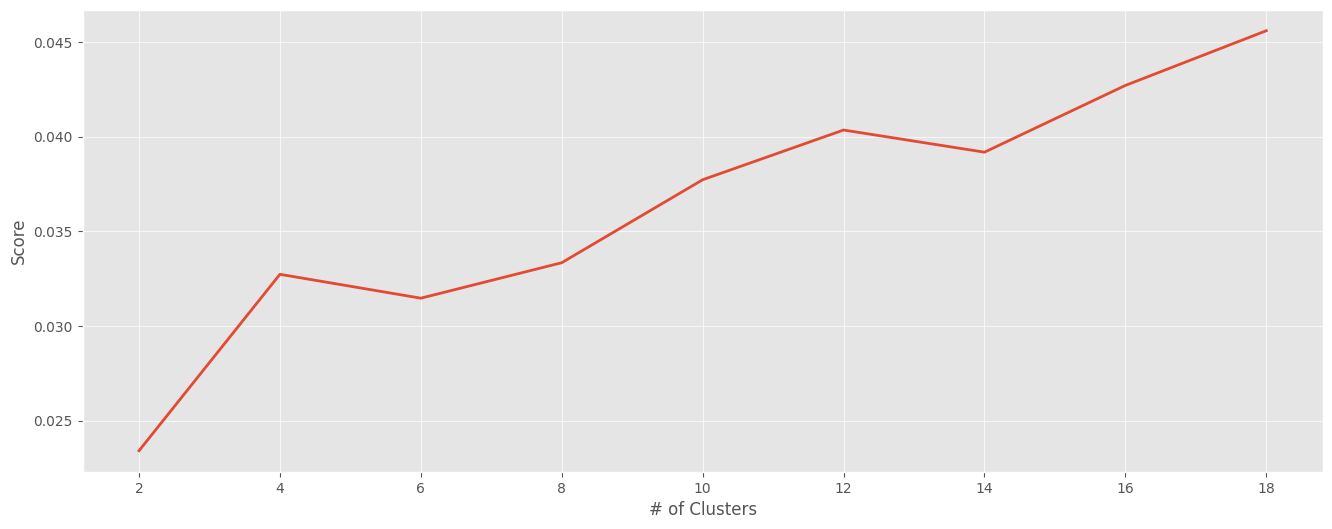

Max Value:
Cluster #    Cluster Score
2       4.822022

Min Value:
Cluster #     Cluster Score
10       3.713005


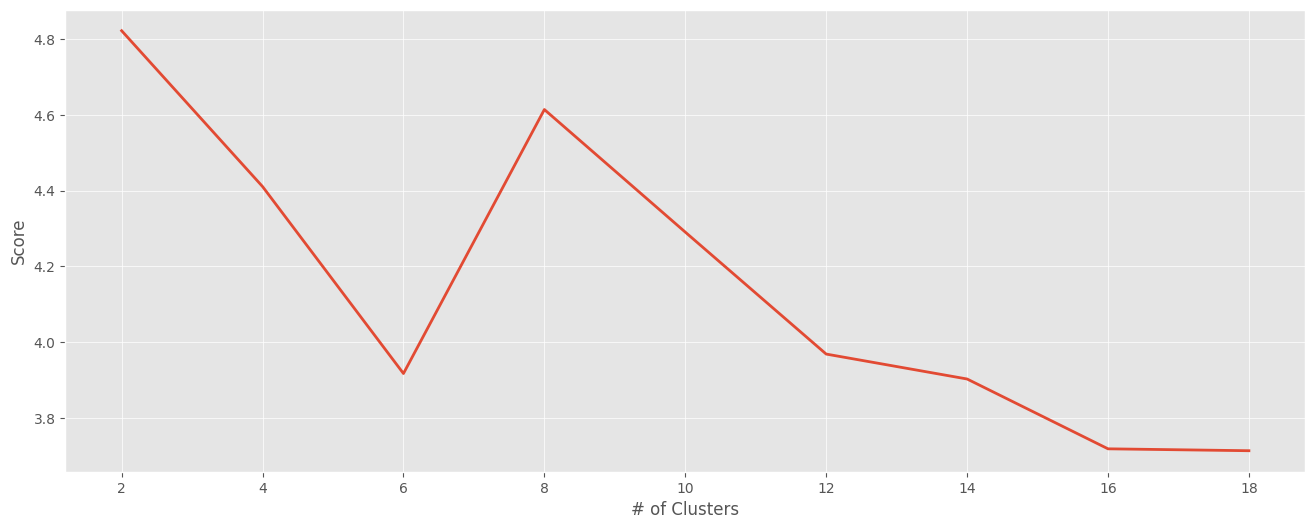

In [12]:
def plot_evaluation(y, x=cluster_cnt):
    """
    Plots the scores of a set evaluation metric. Prints out the max and min values of the evaluation scores.
    """
    
    # Creating a DataFrame for returning the max and min scores for each cluster
    df = pd.DataFrame(columns=['Cluster Score'], index=[i for i in range(2, len(y)+2)])
    df['Cluster Score'] = y
    
    print('Max Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].max()])
    print('\nMin Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].min()])
    
    # Plotting out the scores based on cluster count
    plt.figure(figsize=(16,6))
    plt.style.use('ggplot')
    plt.plot(x,y)
    plt.xlabel('# of Clusters')
    plt.ylabel('Score')
    plt.show()
    
# Running the function on the list of scores
plot_evaluation(scores)

plot_evaluation(db_scores)

In [13]:
# Instantiating HAC
hac = AgglomerativeClustering(n_clusters=12)

# Fitting
hac.fit(df_pca)

# Getting cluster assignments
cluster_assignments = hac.labels_

# Unscaling the categories then replacing the scaled values
df = df[['bios']].join(pd.DataFrame(scaler.inverse_transform(df.drop('bios', axis=1)), columns=df.columns[1:], index=df.index))

# Assigning the clusters to each profile
df['Cluster #'] = cluster_assignments

# Viewing the dating profiles with cluster assignments
df

,bios,games,music,movies,jokes,Cluster #
0,Hipster-friendly explorer. Beer trailblazer. I...,4.0,9.0,4.0,4.0,0
1,Lifelong music scholar. Typical zombie evangel...,6.0,5.0,9.0,9.0,0
2,Writer. Friendly twitter scholar. Hardcore rea...,7.0,5.0,2.0,4.0,8
3,Pop culture buff. Reader. Certified gamer. Web...,8.0,9.0,6.0,8.0,7
4,General organizer. Troublemaker. Certified alc...,7.0,7.0,0.0,5.0,0
...,...,...,...,...,...,...
6820,Food geek. Web fanatic. Music evangelist. Pass...,1.0,9.0,9.0,7.0,3
6821,Lifelong beer expert. Alcohol advocate. Thinke...,3.0,9.0,7.0,8.0,1
6822,Devoted problem solver. Typical bacon ninja. W...,8.0,6.0,7.0,4.0,0
6823,Coffeeaholic. Travel fan. Infuriatingly humble...,1.0,2.0,1.0,4.0,0


# Sorting the clusters

In [14]:
import random

# Randomly choosing a cluster
rand_cluster = random.choice(df['Cluster #'].unique())

# Assigning the Cluster Profiles as a new DF
group = df[df['Cluster #'] == rand_cluster].drop('Cluster #', axis=1)


## Vectorizing the Bios in the Selected Cluster

# Fitting the vectorizer to the Bios
cluster_x = vectorizer.fit_transform(group['bios'])

# Creating a new DF that contains the vectorized words
cluster_v = pd.DataFrame(cluster_x.toarray(), index=group.index, columns=vectorizer.get_feature_names())

#print(cluster_x)
#print(cluster_v)

# Joining the vector DF and the original DF
group = group.join(cluster_v, how='inner', lsuffix='_left', rsuffix='_right')

# Dropping the Bios because it is no longer needed in place of vectorization
group.drop('bios', axis=1, inplace=True)

## Finding Correlations among the users

# Trasnposing the DF so that we are correlating with the index(users)
corr_group = group.T.corr()

#print(corr_group)


## Finding the Top 10 Similar Users

# Randomly selecting a user
random_user = random.choice(corr_group.index)

print("Top 10 most similar users to User #", random_user, '\n')

# Creating a DF with the top 10 most similar users to the selected user
top_10_sim = corr_group[[random_user]].sort_values(by=[random_user],axis=0, ascending=False)[1:11]

# Printing out the results
print(top_10_sim)

print("\nThe most similar user to User #", random_user, "is User #", top_10_sim.index[0])

#get the user 600 and 2920
user_600 = df[df.index == 600]
user_2920 = df[df.index == 2920]

print(user_600)
print(user_2920)


/opt/conda/envs/conda-env-movie/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Top 10 most similar users to User # 4570 

          4570
4540  0.890206
4555  0.890206
4585  0.829067
1228  0.793637
1204  0.784715
2745  0.784514
5092  0.784166
2362  0.778694
4668  0.777742
5064  0.776638

The most similar user to User # 4570 is User # 4540
                                                  bios  games  music  movies  \
600  Infuriatingly humble problem solver. Internet ...    7.0    4.0     1.0   

     jokes  Cluster #  
600    6.0          2  
                                                   bios  games  music  movies  \
2920  Web specialist. Infuriatingly humble beer buff...    8.0    5.0     1.0   

      jokes  Cluster #  
2920    7.0          2  


In [15]:
with open('clustered_profiles.pkl', 'wb') as picklefile:
    pickle.dump(df, picklefile)